# Plotting parametric geometry

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata # interpolation
from mpl_toolkits.mplot3d import Axes3D # for 3D if needed
from matplotlib import cm # colormap
from matplotlib import ticker # controls number of ticks in colorbar, helpful for very ugly unsymmetric colorbar

In [20]:
nodes = np.hstack([x_array, y_array])

In [21]:
n_points = 300
# Intepolation points
x = np.linspace(lb[0], ub[0], n_points)
y = np.linspace(lb[1], ub[1], n_points)
# Create meshgrid
X, Y = np.meshgrid(x,y)

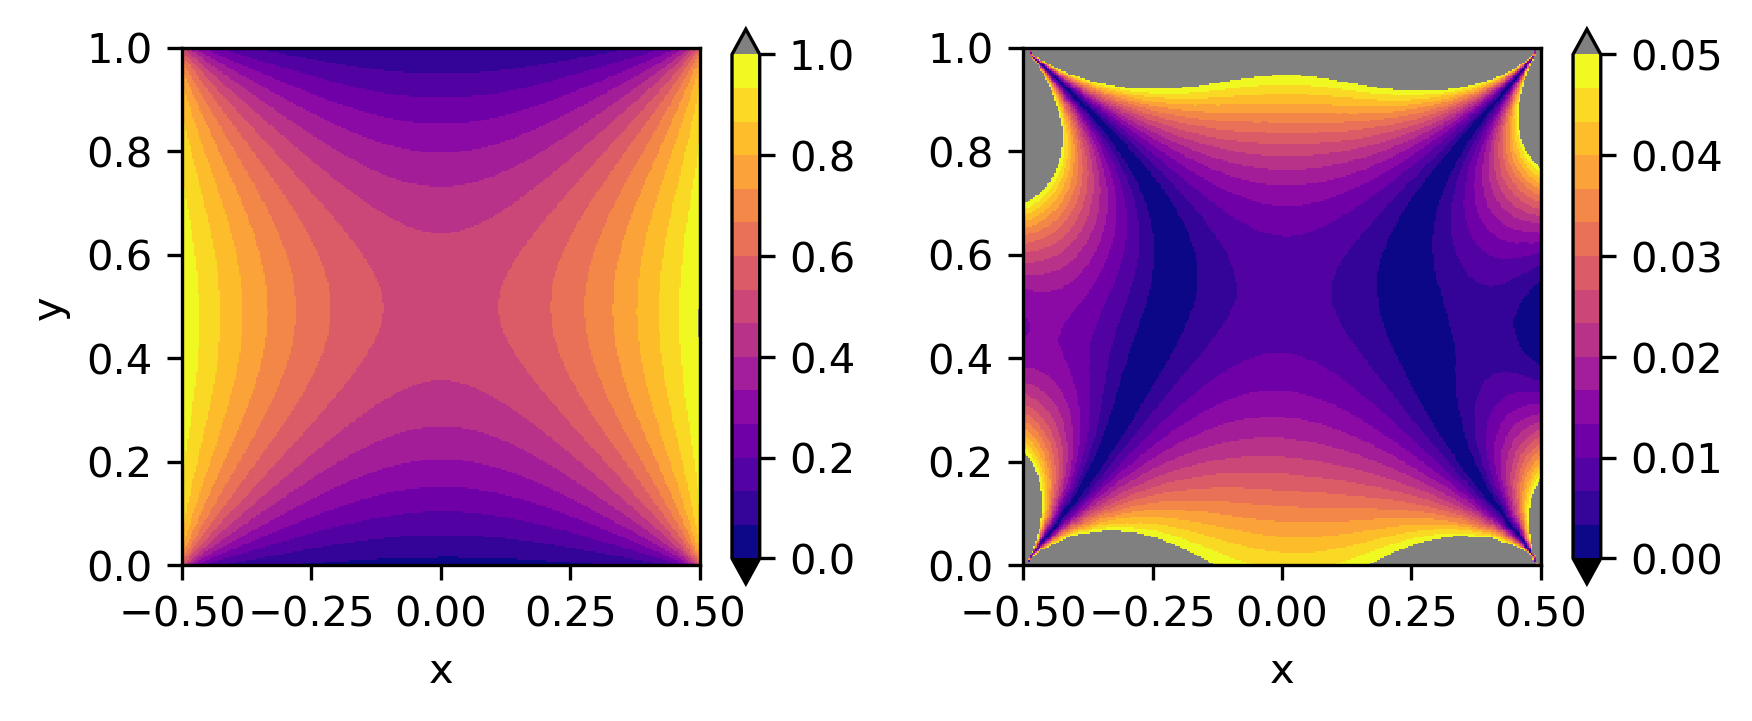

In [27]:
fig, ax = plt.subplots(1, 2,dpi=300)
#ax = fig.add_subplot(111)#, projection='3d')
# deepxde result
data_deepxde = griddata(nodes, u_pred.flatten(), (X, Y), method='linear')
sc1 = ax[0].imshow(data_deepxde, interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes[:,0].min(), nodes[:,0].max(), nodes[:,1].min(), nodes[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=1)

n_points = 300
# Intepolation points
x = np.linspace(lb[0], ub[0], n_points)
y = np.linspace(lb[1], ub[1], n_points)
# Create meshgrid
X, Y = np.meshgrid(x,y)

# absolute pointwise difference
data_difference = griddata(nodes, u_true.flatten(), (X, Y), method='linear')
sc2 = ax[1].imshow(abs(data_difference-data_deepxde), interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes[:,0].min(), nodes[:,0].max(), nodes[:,1].min(), nodes[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=0.05)

sc1.cmap.set_under('k')
sc1.cmap.set_over('gray')
sc2.cmap.set_under('k')
sc2.cmap.set_over('gray')

#sc = ax.scatter(nodes[:,0], nodes[:,1], c = temperature,s=3, cmap=cm.jet)
#plt.colorbar(sc)
ax[0].set(xlabel='x', ylabel='y')
ax[1].set(xlabel='x', ylabel='')

#ax[0].set_title('(a)')#,fontsize=8)
#ax[1].set_title('(b)')#,fontsize=8)

#fig.tight_layout()
# This one is better than tight_layout
# adjust width and height:https://stackoverflow.com/a/6541454/14598633
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.1   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=None)

#fig.colorbar(sc1, ax=ax.ravel().tolist(),shrink=0.5)
fig.colorbar(sc1, ax=ax[0],shrink=0.5,extend='both')
fig.colorbar(sc2, ax=ax[1],shrink=0.5,extend='both')
#fig.supxlabel('(b) Model 4',y=0.15)

#fig.tight_layout()
#ax.set_zlabel('z')
#plt.title('Temperature distribution')
plt.savefig('plots/solutions.jpg', dpi = 500,bbox_inches='tight',transparent=True)
# https://stackoverflow.com/a/63076575/14598633